In [26]:
# importing the necessary modules
import random
from matplotlib import pyplot as plt
from tabulate import tabulate
from prettytable import PrettyTable

In [27]:
def performance(number_of_customers, Q_time, idle_time, st_end, 
random_service_times, random_iat, total_sys_time):
    # --> Typical Performance Measures of a Queuing System <--
    # Average waiting time = (total times customers wait in queue)/(total number of customers)
    wait_avg = sum(Q_time)/number_of_customers

    # Probability of waiting = (number of customers who wait)/(total number of customers)
    customers_who_wait = len(list(filter(lambda x:x>0, Q_time)))
    waiting_prob = (customers_who_wait / number_of_customers) * 100

    # Probability of idle server = (total idle time of server)/(total runtime of simulation)
    idle_prob = sum(idle_time) / st_end[number_of_customers - 1]

    # Average service time = (total service time)/(total number of customers)
    st_avg = sum(random_service_times) / number_of_customers

    # Average time between arrivals = (sum of interarrival times)/(total number of customers - 1)
    iat_avg = sum(random_iat) / (number_of_customers - 1)

    # Average waiting time of those who wait = (total time of customers wait in queue)/(total number of customers who wait)
    wait_avg_who_wait = sum(Q_time) / customers_who_wait

    # Average time a customer spends in system = (total Time in system)/(total number of customers)
    avg_t_sys = sum(total_sys_time) / number_of_customers


    print("\n\n\n--> Typical Performance Measures of a Queuing System <--")
    print("********************************************************\n")
    print("Average waiting time = {:.2f}".format(wait_avg))
    print("\n============================================\n")
    print("Probability of waiting = {:.2f} %".format(waiting_prob))
    print("\n============================================\n")
    print("Probability of idle server = {:.2f} %".format(idle_prob))
    print("\n============================================\n")
    print("Average service time = {:.2f}".format(st_avg))
    print("\n============================================\n")
    print("Average time between arrivals = {:.2f}".format(iat_avg))
    print("\n============================================\n")
    print("Average waiting time of those who wait = {:.2f}".format(wait_avg_who_wait))
    print("\n============================================\n")
    print("Average time a customer spends in system = {:.2f}".format(avg_t_sys))
    print("\n \t**************************************\n\n")

In [28]:
def rand_iat(number_of_customers):
    # random.seed() generates the same random number for a certain seed each run
    #random.seed(42)
    # Generating random interarrival times list
    random_iat = [random.randint(1, 8) for i in range(number_of_customers)]
    # Fixing the first item in list to 0 every individual run
    random_iat[0] = 0
    return random_iat
    # print(random_iat)

In [29]:
def arrival_times(iat, number_of_customers):
    # Cumulating the arrival times list using the random interarrival times
    arrival_times = [0 for i in range(number_of_customers)]
    for i in range(1, number_of_customers):
        arrival_times[i] = iat[i] + arrival_times[i-1]
    return arrival_times

    """
    print(arrival_times)
    print(len(arrival_times))
    """

In [30]:
def generate_rand_service(service_times, service_probs):
    # Generating random service times list using the given probabilities
    
    random_service_times = random.choices(service_times, service_probs, k=100)
    return random_service_times
    """
    print(random_service_times)
    print(len(random_service_times))
    """

In [31]:
def Q_time(arrival_times, st_begin, number_of_customers):
    Q_time = [0 for i in range(number_of_customers)]
    for i in range(1, number_of_customers):
        Q_time[i] = st_begin[i] - arrival_times[i]
    return Q_time

In [32]:
def total_customer_time_inSystem(arrival_times, random_service_times, number_of_customers):
    # Initializing the lists of the table 
    total_sys_time = [0 for i in range(number_of_customers)]

    # Managing the first item of  each lists
    total_sys_time[0] = random_service_times[0]

    # Computing the simulation results
    for i in range(1, number_of_customers):
        total_sys_time[i] = st_end[i] - arrival_times[i]

    return total_sys_time


In [33]:
def idle_time(number_of_customers, arrival_times, st_end, i):
    # Computing the idle time of the server
    idle_time = [0 for i in range(number_of_customers)]
    for i in range(1, number_of_customers):
        if arrival_times[i] > st_end[i - 1]:
            idle_time[i] = arrival_times[i] - st_end[i - 1]
        else:
            idle_time[i] = 0

    return idle_time
    # print(idle_time)

In [34]:
# Generating the table using prettytable library
def plt_tab(customers_numbers, random_iat, arrival_times, 
random_service_times, st_begin, Q_time, st_end, total_sys_time, idle_time):
    table = PrettyTable()
    table.add_column("Customer Number", customers_numbers)
    table.add_column("IAT", random_iat)
    table.add_column("Arrival Times", arrival_times)
    table.add_column("Service Time", random_service_times)
    table.add_column("Service Time Begin", st_begin)
    table.add_column("Waiting Time in Queue", Q_time)
    table.add_column("Service Time End", st_end)
    table.add_column("Customer Time in System", total_sys_time)
    table.add_column("Server Idle Time", idle_time)
    print(table)

In [35]:
# Generating the table using tabulate library
def plot_table(customers_numbers, random_iat, arrival_times, 
random_service_times, st_begin, Q_time, st_end, total_sys_time, idle_time):
    data = {
        "Customer Number" : customers_numbers, 
        "IAT" : random_iat, 
        "Arrival Times" : arrival_times, 
        "Service Time" : random_service_times, 
        "Service Time Begin" : st_begin, 
        "Waiting Time in Queue" : Q_time, 
        "Service Time End" : st_end, 
        "Customer Time in System" : total_sys_time, 
        "Server Idle Time" : idle_time
        }

    print(tabulate(data, headers = "keys", tablefmt = "fancy_grid"))

╒═══════════════════╤═══════╤═════════════════╤════════════════╤══════════════════════╤═════════════════════════╤════════════════════╤═══════════════════════════╤════════════════════╕
│   Customer Number │   IAT │   Arrival Times │   Service Time │   Service Time Begin │   Waiting Time in Queue │   Service Time End │   Customer Time in System │   Server Idle Time │
╞═══════════════════╪═══════╪═════════════════╪════════════════╪══════════════════════╪═════════════════════════╪════════════════════╪═══════════════════════════╪════════════════════╡
│                 1 │     0 │               0 │              3 │                    0 │                       0 │                  3 │                         3 │                  0 │
├───────────────────┼───────┼─────────────────┼────────────────┼──────────────────────┼─────────────────────────┼────────────────────┼───────────────────────────┼────────────────────┤
│                 2 │     5 │               5 │              1 │                

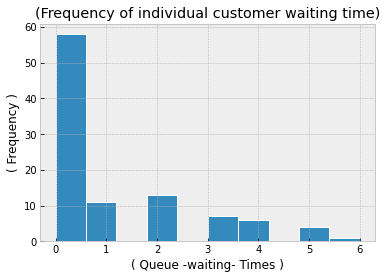

In [36]:
if __name__ == "__main__":

    number_of_customers = 100
    # A list for customer numbers

    customers_numbers = [i for i in range(1, number_of_customers + 1)]
    # print(customers_numbers)

    service_times = [1, 2, 3, 4, 5, 6]
    service_probs = [0.10, 0.20, 0.30, 0.25, 0.10, 0.05]
    # Service time parameters

    random_iat = rand_iat(number_of_customers)

    arrival_times = arrival_times(random_iat, number_of_customers)
    
    random_service_times = generate_rand_service(service_times, service_probs)

    st_begin = [0 for i in range(number_of_customers)]
    st_end = [0 for i in range(number_of_customers)]
    st_begin[0] = arrival_times[0]
    st_end[0] = random_service_times[0]
    for i in range(1, number_of_customers):
        st_begin[i] = max(arrival_times[i], st_end[i - 1])
        st_end[i] = st_begin[i] + random_service_times[i]


    Q_time = Q_time(arrival_times, st_begin, number_of_customers)

    total_sys_time = total_customer_time_inSystem(arrival_times, random_service_times, number_of_customers)

    idle_time =  idle_time(number_of_customers, arrival_times, st_end, i)

    plot_table(customers_numbers, random_iat, arrival_times, random_service_times, st_begin, 
               Q_time, st_end, total_sys_time, idle_time)


    performance(number_of_customers, Q_time, idle_time, st_end, random_service_times, 
                random_iat, total_sys_time)
  
    # Plotting the histogram of frequency of individual customer waiting time
    plt.style.use("bmh")
    fig, ax = plt.subplots()
    ax.hist(Q_time, bins = 10, linewidth = 1.0, edgecolor = "white")
    plt.xlabel("( Queue -waiting- Times )")
    plt.ylabel("( Frequency )")
    plt.title("(Frequency of individual customer waiting time)")
    plt.show()


## ***LECTURE NUMBERS GENERATES THE SAME EXACT NUMBERS AS THE EXAMPLE***

In [37]:
number_of_customers = 11
# A list for customer numbers
customers_numbers = [i for i in range(1, number_of_customers + 1)]


random_iat = [0, 8, 8, 4, 2, 1, 3, 7, 2, 1, 5]



# Cumulating the arrival times list using the random interarrival times
arrival_times = [0 for i in range(number_of_customers)]
for i in range(1, number_of_customers):
    arrival_times[i] = random_iat[i] + arrival_times[i-1]

random_service_times = [3, 3, 5, 3, 4, 2, 3, 2, 5, 4, 5]


# Initializing the lists of the table 
st_begin = [0 for i in range(number_of_customers)]
Q_time = [0 for i in range(number_of_customers)]
st_end = [0 for i in range(number_of_customers)]
total_sys_time = [0 for i in range(number_of_customers)]
idle_time = [0 for i in range(number_of_customers)]

# Managing the first item of  each lists
st_begin[0] = arrival_times[0]
st_end[0] = random_service_times[0]
total_sys_time[0] = random_service_times[0]

# Computing the simulation results
for i in range(1, number_of_customers):
    st_begin[i] = max(arrival_times[i], st_end[i - 1])
    Q_time[i] = st_begin[i] - arrival_times[i]
    st_end[i] = st_begin[i] + random_service_times[i]
    total_sys_time[i] = st_end[i] - arrival_times[i]
    # Computing the idle time of the server
    if arrival_times[i] > st_end[i - 1]:
        idle_time[i] = arrival_times[i] - st_end[i - 1]
    else:
        idle_time[i] = 0



# Generating the table using tabulate library
data = {
    "Customer Number" : customers_numbers, 
    "IAT" : random_iat, 
    "Arrival Times" : arrival_times, 
    "Service Time" : random_service_times, 
    "Service Time Begin" : st_begin, 
    "Waiting Time in Queue" : Q_time, 
    "Service Time End" : st_end, 
    "Customer Time in System" : total_sys_time, 
    "Server Idle Time" : idle_time
    }

print(tabulate(data, headers = "keys", tablefmt = "fancy_grid"))



"""
Typical Performance Measures of a Queuing System:
"""

# Average waiting time = (total times customers wait in queue)/(total number of customers)
wait_avg = sum(Q_time)/number_of_customers

# Probability of waiting = (number of customers who wait)/(total number of customers)
customers_who_wait = len(list(filter(lambda x:x>0, Q_time)))
waiting_prob = (customers_who_wait / number_of_customers) * 100

# Probability of idle server = (total idle time of server)/(total runtime of simulation)
idle_prob = sum(idle_time) / st_end[number_of_customers - 1]

# Average service time = (total service time)/(total number of customers)
st_avg = sum(random_service_times) / number_of_customers

# Average time between arrivals = (sum of interarrival times)/(total number of customers - 1)
iat_avg = sum(random_iat) / (number_of_customers - 1)

# Average waiting time of those who wait = (total time of customers wait in queue)/(total number of customers who wait)
wait_avg_who_wait = sum(Q_time) / customers_who_wait


# Average time a customer spends in system = (total Time in system)/(total number of customers)
avg_t_sys = sum(total_sys_time) / number_of_customers


print("\n\n--> Typical Performance Measures of a Queuing System <--")
print("********************************************************\n")
print("Average waiting time = {:.2f}".format(wait_avg))
print("\n============================================\n")
print("Probability of waiting = {:.2f} %".format(waiting_prob))
print("\n============================================\n")
print("Probability of idle server = {:.2f} %".format(idle_prob))
print("\n============================================\n")
print("Average service time = {:.2f}".format(st_avg))
print("\n============================================\n")
print("Average time between arrivals = {:.2f}".format(iat_avg))
print("\n============================================\n")
print("Average waiting time of those who wait = {:.2f}".format(wait_avg_who_wait))
print("\n============================================\n")
print("Average time a customer spends in system = {:.2f}".format(avg_t_sys))
print("\n \t**************************************")


╒═══════════════════╤═══════╤═════════════════╤════════════════╤══════════════════════╤═════════════════════════╤════════════════════╤═══════════════════════════╤════════════════════╕
│   Customer Number │   IAT │   Arrival Times │   Service Time │   Service Time Begin │   Waiting Time in Queue │   Service Time End │   Customer Time in System │   Server Idle Time │
╞═══════════════════╪═══════╪═════════════════╪════════════════╪══════════════════════╪═════════════════════════╪════════════════════╪═══════════════════════════╪════════════════════╡
│                 1 │     0 │               0 │              3 │                    0 │                       0 │                  3 │                         3 │                  0 │
├───────────────────┼───────┼─────────────────┼────────────────┼──────────────────────┼─────────────────────────┼────────────────────┼───────────────────────────┼────────────────────┤
│                 2 │     8 │               8 │              3 │                